In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
import numpy as np
import pandas as pd
import datetime

# We will use matplotlib to plot figures
import matplotlib.pyplot as plt

# For regression analysis we will use the statsmodels package
import statsmodels.formula.api as sm

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from matplotlib.pyplot import figure
#for boxcox transformation 
import scipy.stats  as stat

from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots


In [2]:
data_file = 'Tdata.xlsx'

tourism_jobs = pd.read_excel(data_file)

print(tourism_jobs .dtypes)


tourism_jobs['REF_DATE'] =  pd.to_datetime(tourism_jobs['REF_DATE'], format="%Y-%m")



REF_DATE       object
Activities     object
VALUE         float64
dtype: object


In [3]:
print(tourism_jobs.head(10));

    REF_DATE                  Activities  VALUE
0 1986-01-01          Tourism activities  403.2
1 1986-01-01    Total tourism industries  327.0
2 1986-01-01              Transportation   56.2
3 1986-01-01               Accommodation   99.3
4 1986-01-01  Food and beverage services  118.9
5 1986-01-01    Other tourism activities   52.6
6 1986-04-01          Tourism activities  430.6
7 1986-04-01    Total tourism industries  348.7
8 1986-04-01              Transportation   57.1
9 1986-04-01               Accommodation  105.0


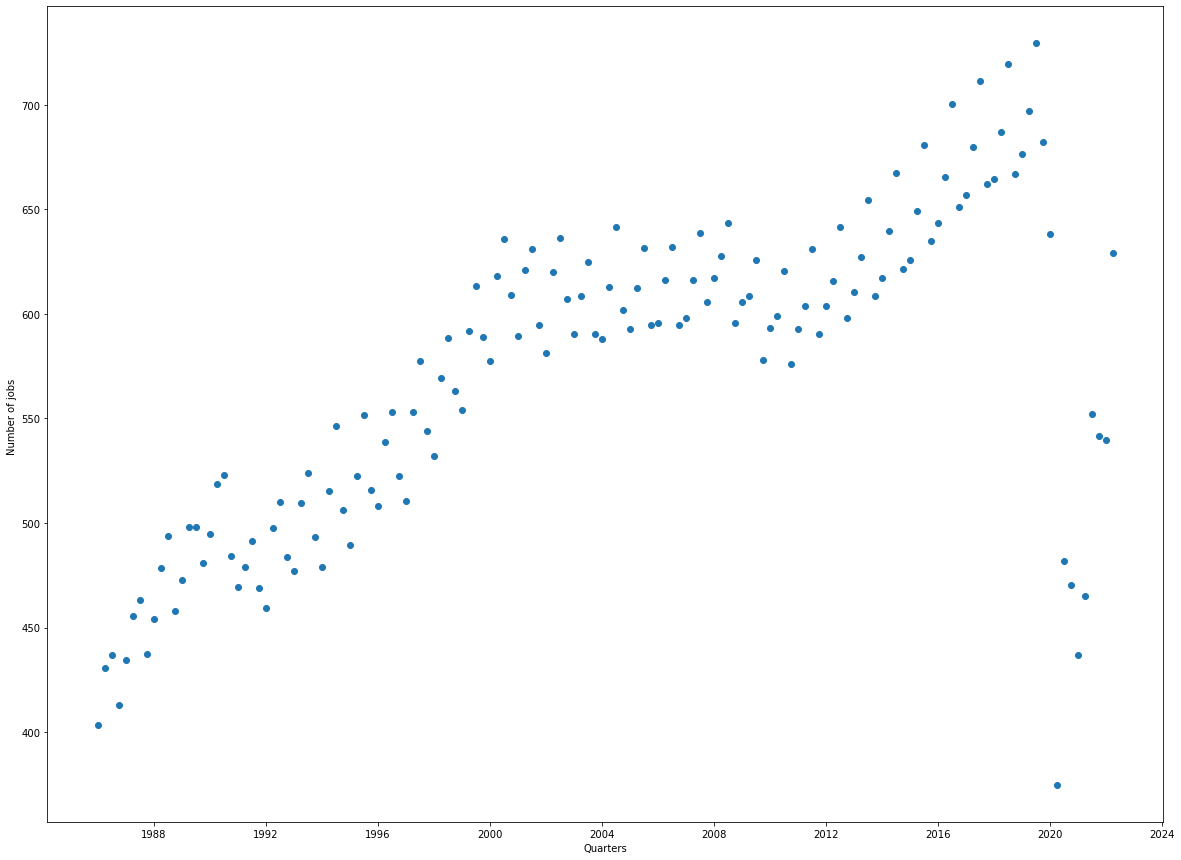

In [4]:
#total_jobs = tourism_jobs[["Activities"==''].str.contains("Total")]

total_jobs = tourism_jobs.loc[tourism_jobs["Activities"]=='Tourism activities']
plt.figure(figsize=(20,15))
plt.scatter(total_jobs.REF_DATE,total_jobs.VALUE);

#plt.figsize=(15,20);
plt.xlabel('Quarters')
plt.ylabel('Number of jobs ')
plt.show()

In [5]:
#fix data to be be before covid 

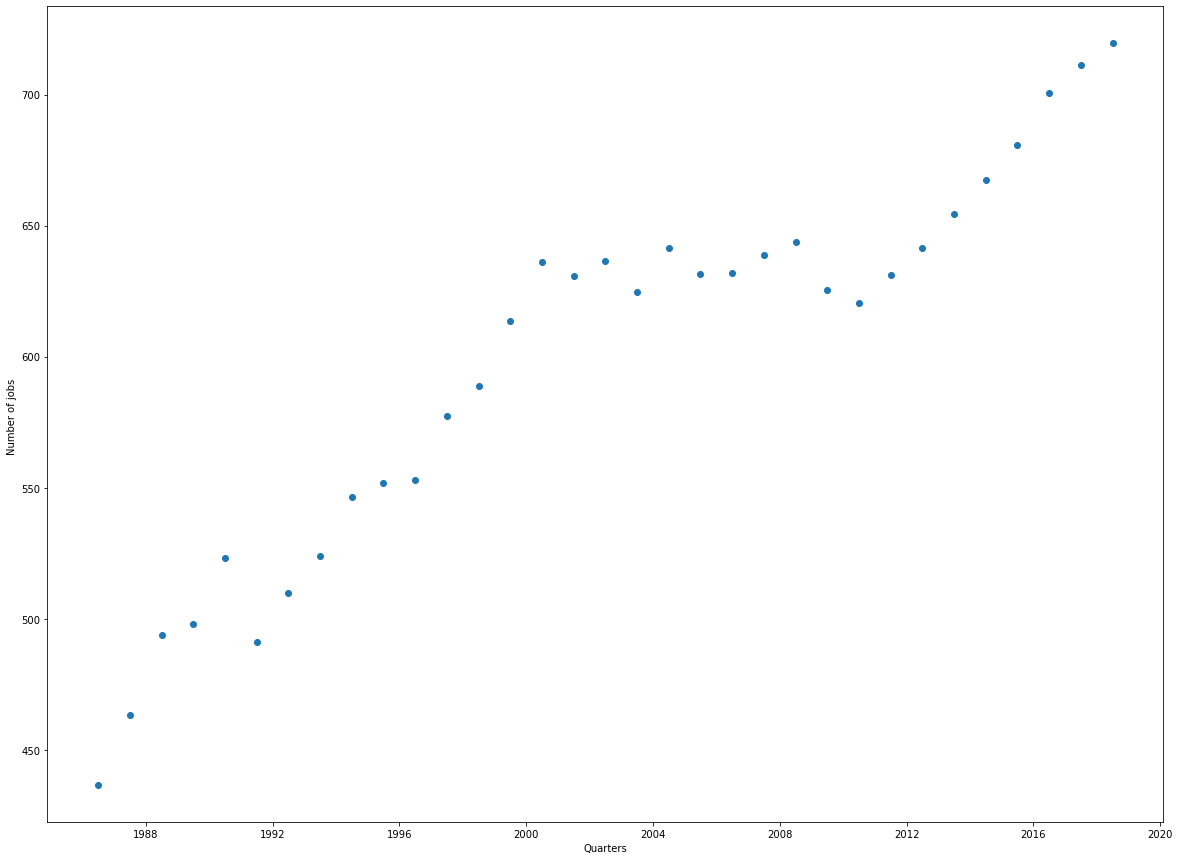

In [6]:

summer_jobs = tourism_jobs[tourism_jobs['REF_DATE'].dt.strftime('%m') == '07']
total_summer_jobs = summer_jobs.loc[summer_jobs["Activities"]=='Tourism activities']
total_summer_jobs_temp = total_summer_jobs.copy()
total_summer_jobs_preCovid = total_summer_jobs_temp.drop(total_summer_jobs_temp.loc[total_summer_jobs_temp['REF_DATE'] > '01-12-2019'].index)
plt.figure(figsize=(20,15))
plt.scatter(total_summer_jobs_preCovid.REF_DATE,total_summer_jobs_preCovid.VALUE);

#plt.figsize=(15,20);
plt.xlabel('Quarters')
plt.ylabel('Number of jobs ')
plt.show()

In [7]:
mu_total_summer = total_summer_jobs_preCovid.VALUE.mean();
sigma_total_summer = total_summer_jobs_preCovid.VALUE.std();
print('mu',mu_total_summer)
print('std',sigma_total_summer)
#zscore = (x - mean) / std
#print('zscore',zscore)

mu 598.1545454545454
std 73.47617849900865


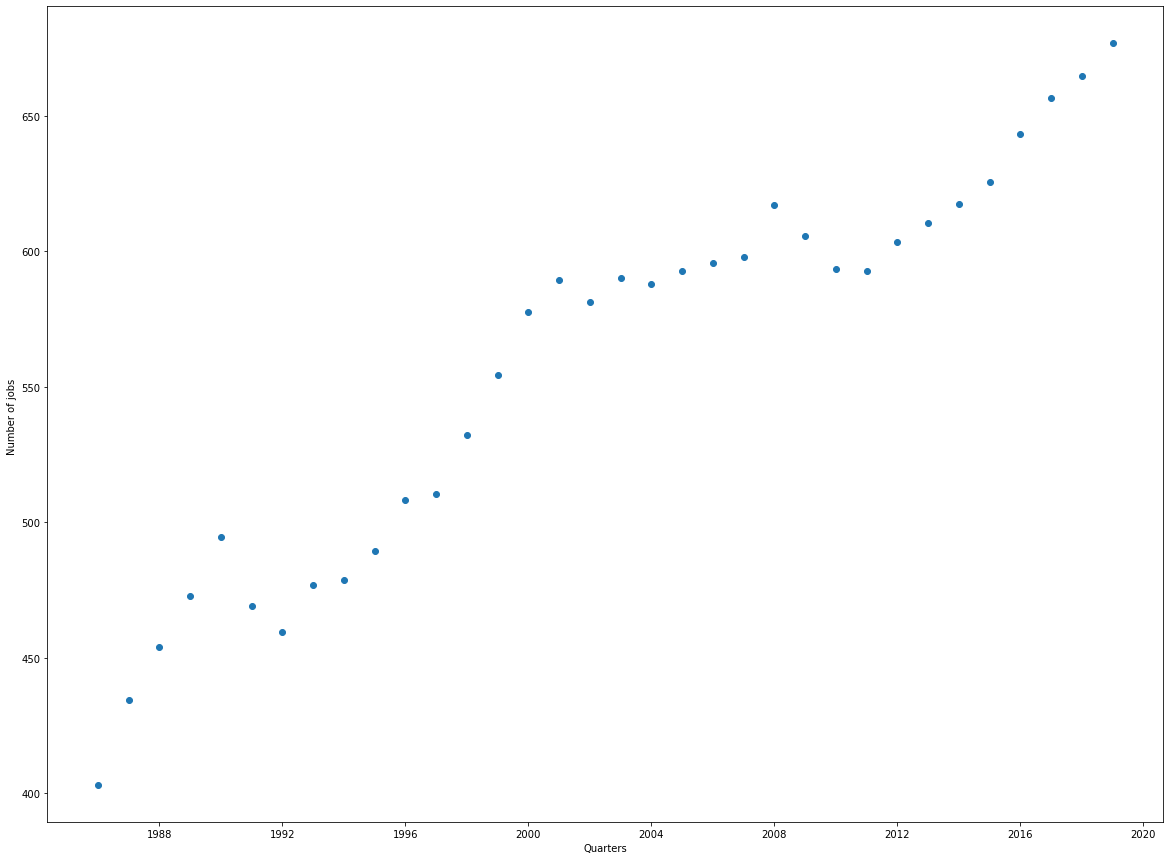

mu 557.5617647058824
std 72.5104089276295


In [8]:
winter_jobs = tourism_jobs[tourism_jobs['REF_DATE'].dt.strftime('%m') == '01']
total_winter_jobs = winter_jobs.loc[winter_jobs["Activities"]=='Tourism activities']
total_winter_jobs_temp = total_winter_jobs.copy()
total_winter_jobs_preCovid = total_winter_jobs_temp.drop(total_winter_jobs_temp.loc[total_winter_jobs_temp['REF_DATE'] > '01-12-2019'].index)
plt.figure(figsize=(20,15))
plt.scatter(total_winter_jobs_preCovid.REF_DATE,total_winter_jobs_preCovid.VALUE);

#plt.figsize=(15,20);
plt.xlabel('Quarters')
plt.ylabel('Number of jobs ')
plt.show()

mu_total_winter = total_winter_jobs_preCovid.VALUE.mean();
sigma_total_winter = total_winter_jobs_preCovid.VALUE.std();
print('mu',mu_total_winter)
print('std',sigma_total_winter)

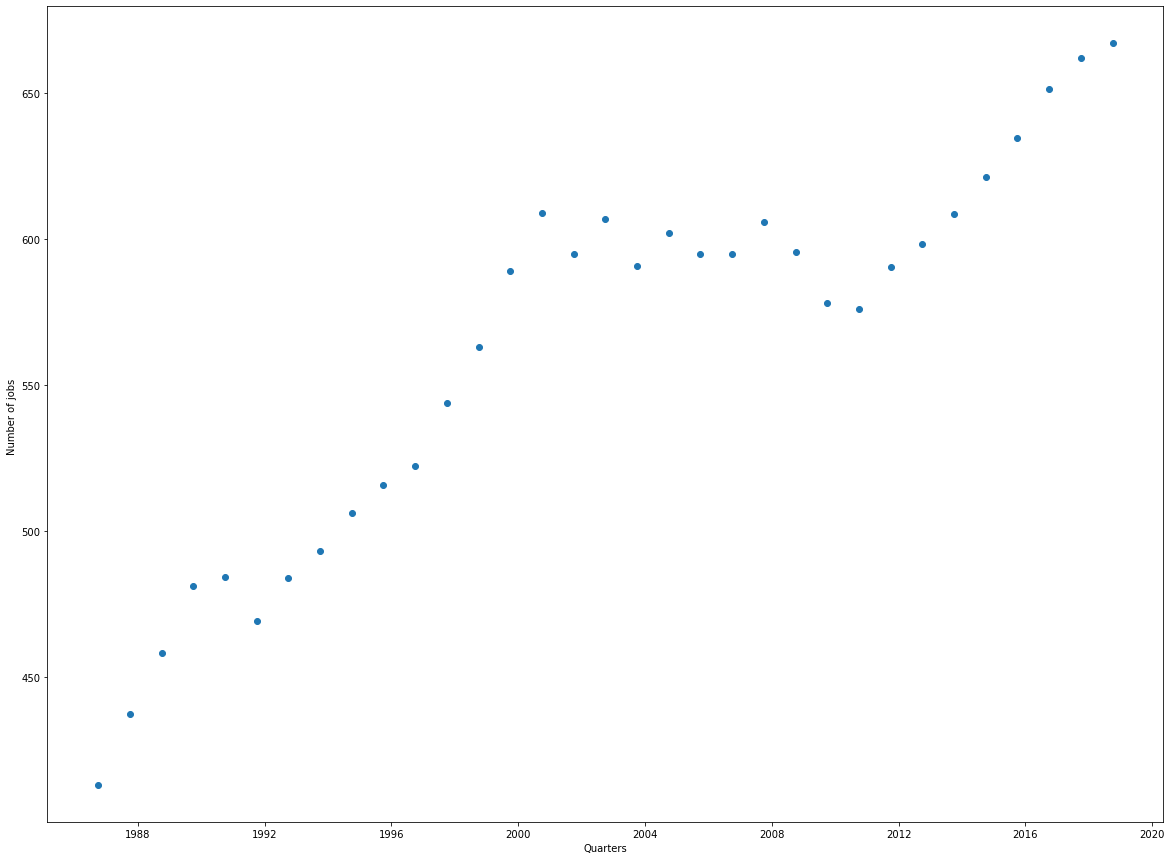

mu 561.8666666666667
std 67.10863704968732


In [9]:

fall_jobs = tourism_jobs[tourism_jobs['REF_DATE'].dt.strftime('%m') == '10']
total_fall_jobs = fall_jobs.loc[fall_jobs["Activities"]=='Tourism activities']
total_fall_jobs_temp = total_fall_jobs.copy()
total_fall_jobs_preCovid = total_fall_jobs_temp.drop(total_fall_jobs_temp.loc[total_fall_jobs_temp['REF_DATE'] > '01-12-2019'].index)
plt.figure(figsize=(20,15))
plt.scatter(total_fall_jobs_preCovid.REF_DATE,total_fall_jobs_preCovid.VALUE);

#plt.figsize=(15,20);
plt.xlabel('Quarters')
plt.ylabel('Number of jobs ')
plt.show()

mu_total_fall = total_fall_jobs_preCovid.VALUE.mean();
sigma_total_fall = total_fall_jobs_preCovid.VALUE.std();
print('mu',mu_total_fall)
print('std',sigma_total_fall)

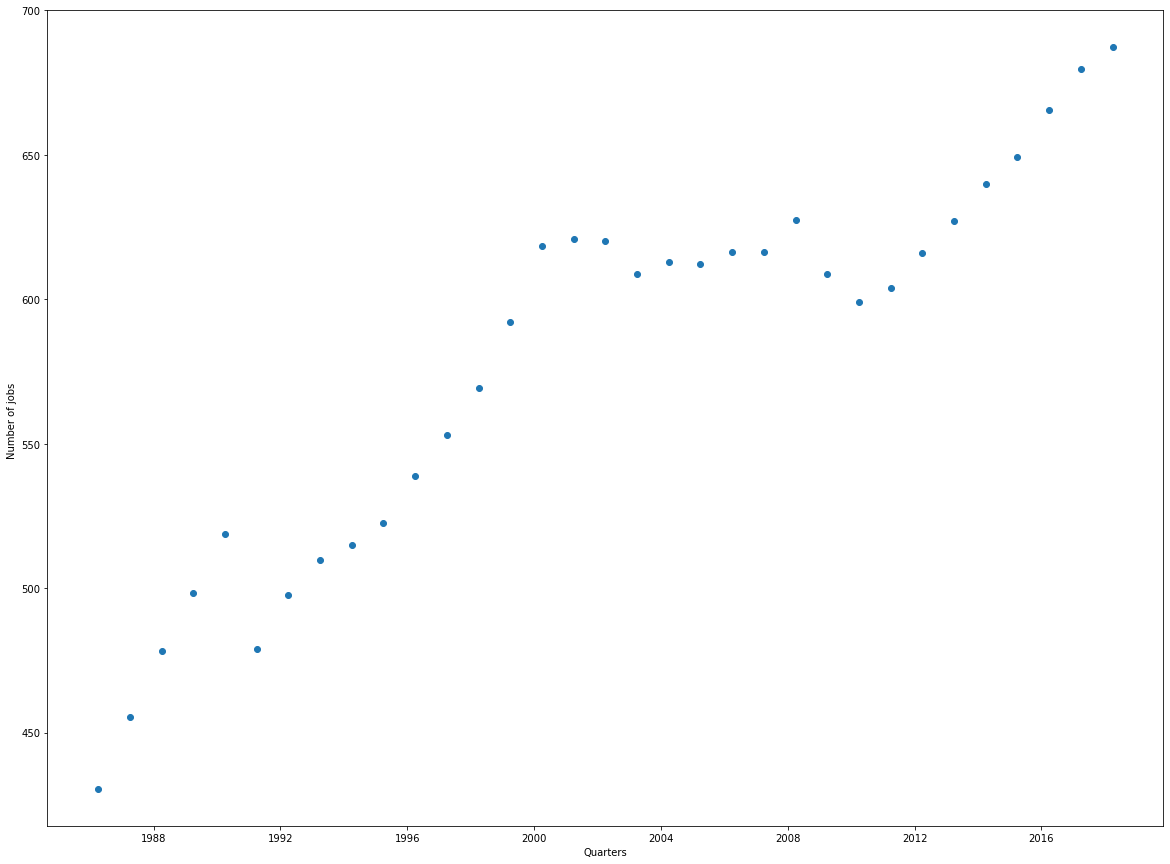

mu 578.4696969696969
std 67.47517823637298


In [10]:

spring_jobs = tourism_jobs[tourism_jobs['REF_DATE'].dt.strftime('%m') == '04']
total_spring_jobs = spring_jobs.loc[spring_jobs["Activities"]=='Tourism activities']
total_spring_jobs_temp = total_spring_jobs.copy()
total_spring_jobs_preCovid = total_spring_jobs_temp.drop(total_spring_jobs_temp.loc[total_spring_jobs_temp['REF_DATE'] > '01-12-2019'].index)
plt.figure(figsize=(20,15))
plt.scatter(total_spring_jobs_preCovid.REF_DATE,total_spring_jobs_preCovid.VALUE);

#plt.figsize=(15,20);
plt.xlabel('Quarters')
plt.ylabel('Number of jobs ')
plt.show()

mu_total_spring = total_spring_jobs_preCovid.VALUE.mean();
sigma_total_spring = total_spring_jobs_preCovid.VALUE.std();
print('mu',mu_total_spring)
print('std',sigma_total_spring)

In [11]:
#*****************


In [12]:

zscore_fall = (mu_total_fall - mu_total_summer) / sigma_total_summer
print('zscore',zscore_fall)
p_fall = stat.norm.cdf(zscore_fall)
print ('p is ', p_fall)


zscore -0.49387270172697334
p is  0.3106980423087029


In [13]:

zscore_winter = (mu_total_winter - mu_total_summer) / sigma_total_summer
print('zscore',zscore_winter)
p_winter = stat.norm.cdf(zscore_winter)
print ('p is ', p_winter )


zscore -0.5524617852738585
p is  0.29031600480272146


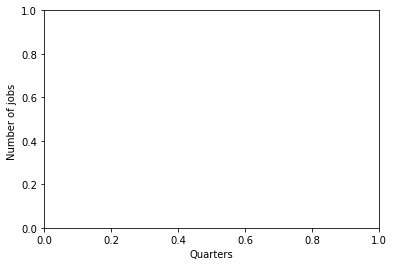

mu 573.8894736842109
std 71.24593477308434
zscore 0.34058184298680194
p is  0.633290799861508


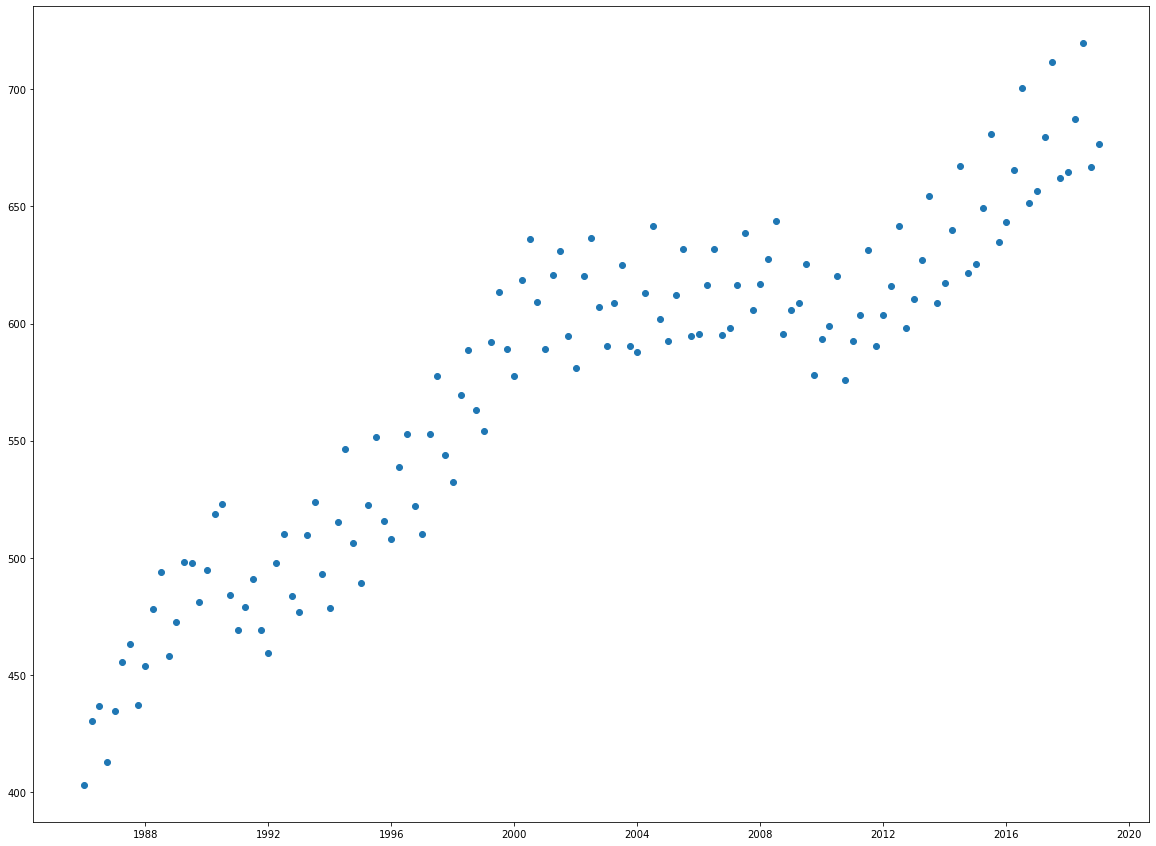

In [23]:

total_jobs = tourism_jobs.loc[tourism_jobs["Activities"]=='Tourism activities']
#plt.figure(figsize=(20,15))
#plt.scatter(total_jobs.REF_DATE,total_jobs.VALUE);

#plt.figsize=(15,20);
plt.xlabel('Quarters')
plt.ylabel('Number of jobs ')
plt.show()

total_jobs_temp = total_jobs.copy()
total_jobs_preCovid = total_jobs_temp.drop(total_jobs_temp.loc[total_jobs_temp['REF_DATE'] > '01-12-2019'].index)
plt.figure(figsize=(20,15))
plt.scatter(total_jobs_preCovid.REF_DATE,total_jobs_preCovid.VALUE);

mu_total_all = total_jobs_preCovid.VALUE.mean();
sigma_total_all = total_jobs_preCovid.VALUE.std();
print('mu',mu_total_all)
print('std',sigma_total_all)
zscore_all = (mu_total_summer - mu_total_all) / sigma_total_all
print('zscore',zscore_all)
p_all = stat.norm.cdf(zscore_all)
print ('p is ', p_all )


In [24]:
total_jobs_preCovid

,REF_DATE,Activities,VALUE
0,1986-01-01,Tourism activities,403.2
6,1986-04-01,Tourism activities,430.6
12,1986-07-01,Tourism activities,436.7
18,1986-10-01,Tourism activities,413.0
24,1987-01-01,Tourism activities,434.6
...,...,...,...
768,2018-01-01,Tourism activities,664.6
774,2018-04-01,Tourism activities,687.2
780,2018-07-01,Tourism activities,719.5
786,2018-10-01,Tourism activities,667.0


n All =  133
n Summer Sample =  33
SE Summer Sample =  12.402325321671066


Text(0.5, 1.0, 'Null hypothesis')

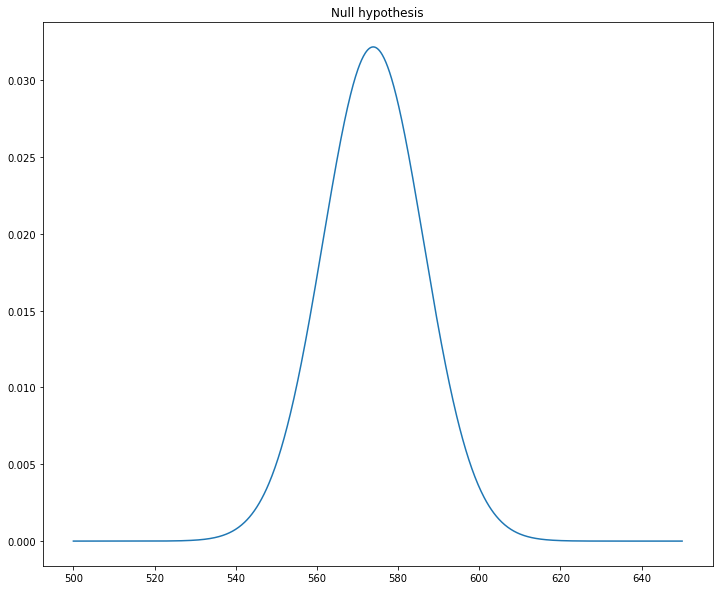

In [15]:
from math import sqrt
n_all = len(total_jobs_preCovid.index)
print('n All = ',n_all)

n_summer_sample = len(total_summer_jobs_preCovid.index)
print('n Summer Sample = ',n_summer_sample)



se = sigma_total_all/sqrt(n_summer_sample)
print('SE Summer Sample = ',se)
plt.figure(figsize=(12,10))

x = np.linspace(500, 650, 1000)
plt.plot(x, stat.norm.pdf(x, loc=mu_total_all, scale=se))

plt.title("Null hypothesis")



H0 mean <= mu_total_all 
HA mean > mu_total_all 
alpha = 0.1 

In [16]:
n_summer_sample = len(total_summer_jobs_preCovid.index)
print('n Summer Sample = ',n_summer_sample)

se_summer = sigma_total_all/sqrt(n_summer_sample)
print('SE Summer Sample = ',se_summer)

mu_total_summer = total_summer_jobs_preCovid.VALUE.mean();
sigma_total_summer = total_summer_jobs_preCovid.VALUE.std();
print('mu summer',mu_total_summer)
print('std summer',sigma_total_summer)
zscore_summer = (mu_total_summer - mu_total_all) / (  sigma_total_all /sqrt(n_summer_sample))
#sigma_total_summer #sigma_total_all
print('Z score for summer sample is ', zscore_summer)
# ?? p_summer_value= stat.norm.cdf(mu_total_summer, loc=mu_total_all, scale=se)
p_summer = stat.norm.cdf(zscore_summer)
print ('p is ', p_summer )
p_value_2= stat.norm.cdf(mu_total_summer, loc=mu_total_all, scale=se_summer)
print('P-value 2 for given sample is ', p_value_2)
print('P-value for given sample is ', p_summer)
x_cr_summer = stat.norm.ppf(0.90, loc=mu_total_all, scale=se_summer)
print('Critical Value is ', x_cr_summer)
if p_summer <0.9:
    print("Summer season does not produce more jobs than usual ")
else:
    print("Summer season is effective on creating jobs ")
    

n Summer Sample =  33
SE Summer Sample =  12.402325321671066
mu summer 598.1545454545454
std summer 73.47617849900865
Z score for summer sample is  1.9564937333110621
p is  0.9747964900235914
P-value 2 for given sample is  0.9747964900235914
P-value for given sample is  0.9747964900235914
Critical Value is  589.7836931165918
Summer season is effective on creating jobs 


In [17]:
n_winter_sample = len(total_winter_jobs_preCovid.index)
print('n winter Sample = ',n_winter_sample)

se_winter = sigma_total_all/sqrt(n_winter_sample)
print('SE winter Sample = ',se_winter)

mu_total_winter = total_winter_jobs_preCovid.VALUE.mean();
sigma_total_winter = total_winter_jobs_preCovid.VALUE.std();
print('mu winter',mu_total_winter)
print('std winter',sigma_total_winter)
zscore_winter = (mu_total_winter - mu_total_all) / (  sigma_total_all /sqrt(n_winter_sample))

print('Z score for winter sample is ', zscore_winter)

p_winter = stat.norm.cdf(zscore_winter)
print ('p is ', p_winter )
p_value_2= stat.norm.cdf(mu_total_winter, loc=mu_total_all, scale=se_winter)
print('P-value 2 for given sample is ', p_value_2)
print('P-value for given sample is ', p_winter)
x_cr_winter = stat.norm.ppf(0.90, loc=mu_total_all, scale=se_winter)
print('Critical Value is ', x_cr_winter)
if p_winter <0.9:
    print("winter season does not produce more jobs  ")
else:
    print("winter season is effective on creating jobs ")
    

n winter Sample =  34
SE winter Sample =  12.218577010739436
mu winter 557.5617647058824
std winter 72.5104089276295
Z score for winter sample is  -1.3363020066884501
p is  0.09072529044631156
P-value 2 for given sample is  0.09072529044631156
P-value for given sample is  0.09072529044631156
Critical Value is  589.5482101810512
winter season does not produce more jobs  


In [18]:
n_spring_sample = len(total_spring_jobs_preCovid.index)
print('n spring Sample = ',n_spring_sample)

se_spring = sigma_total_all/sqrt(n_spring_sample)
print('SE spring Sample = ',se_spring)

mu_total_spring = total_spring_jobs_preCovid.VALUE.mean();
sigma_total_spring = total_spring_jobs_preCovid.VALUE.std();
print('mu spring',mu_total_spring)
print('std spring',sigma_total_spring)
zscore_spring = (mu_total_spring - mu_total_all) / (  sigma_total_all /sqrt(n_spring_sample))

print('Z score for spring sample is ', zscore_spring)

p_spring = stat.norm.cdf(zscore_spring)
print ('p is ', p_spring )
p_value_2= stat.norm.cdf(mu_total_spring, loc=mu_total_all, scale=se_spring)
print('P-value 2 for given sample is ', p_value_2)
print('P-value for given sample is ', p_spring)
x_cr_spring = stat.norm.ppf(0.90, loc=mu_total_all, scale=se_spring)
print('Critical Value is ', x_cr_spring)
if p_spring <0.90:
    print("spring season does not produce more jobs  ")
else:
    print("spring season is effective on creating jobs ")
    

n spring Sample =  33
SE spring Sample =  12.402325321671066
mu spring 578.4696969696969
std spring 67.47517823637298
Z score for spring sample is  0.36930359160010073
p is  0.644049275613848
P-value 2 for given sample is  0.644049275613848
P-value for given sample is  0.644049275613848
Critical Value is  589.7836931165918
spring season does not produce more jobs  


In [19]:
n_fall_sample = len(total_fall_jobs_preCovid.index)
print('n fall Sample = ',n_fall_sample)

se_fall = sigma_total_all/sqrt(n_fall_sample)
print('SE fall Sample = ',se_fall)

mu_total_fall = total_fall_jobs_preCovid.VALUE.mean();
sigma_total_fall = total_fall_jobs_preCovid.VALUE.std();
print('mu fall',mu_total_fall)
print('std fall',sigma_total_fall)
zscore_fall = (mu_total_fall - mu_total_all) / (  sigma_total_all /sqrt(n_fall_sample))
#zscore_fall = (mu_total_fall - mu_total_all) / sigma_total_all 
print('Z score for fall sample is ', zscore_fall)

p_fall = stat.norm.cdf(zscore_fall)
print ('p is ', p_fall )
p_value_2= stat.norm.cdf(mu_total_fall, loc=mu_total_all, scale=se_fall)
print('P-value 2 for given sample is ', p_value_2)
print('P-value for given sample is ', p_fall)
x_cr_fall = stat.norm.ppf(0.90, loc=mu_total_all, scale=se_fall)
print('Critical Value is ', x_cr_fall)
if p_fall <0.90:
    print("fall season does not produce more jobs  ")
else:
    print("fall season is effective on creating jobs ")
x_cr = x_cr_fall

n fall Sample =  33
SE fall Sample =  12.402325321671066
mu fall 561.8666666666667
std fall 67.10863704968732
Z score for fall sample is  -0.9693994235529599
p is  0.16617296991982972
P-value 2 for given sample is  0.16617296991982972
P-value for given sample is  0.16617296991982972
Critical Value is  589.7836931165918
fall season does not produce more jobs  


Text(0.5, 1.0, 'Null hypothesis')

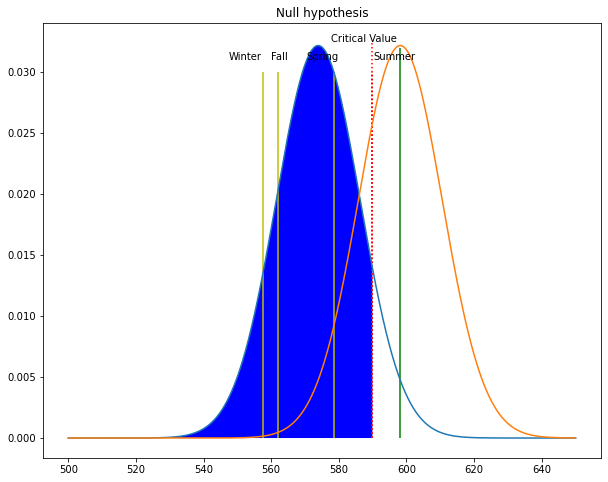

In [20]:
plt.figure(figsize=(10,8))

x = np.linspace(500, 650, 1000)
plt.plot(x, stat.norm.pdf(x, loc=mu_total_all, scale=se))
plt.plot(x, stat.norm.pdf(x, loc=mu_total_summer, scale=se))
plt.fill_between(x=np.arange(500, 590, 0.1), y1=stat.norm.pdf(np.arange(500, 590, 0.1), loc=mu_total_all, scale=se),facecolor='blue')

plt.vlines(x_cr, 0, 0.0324 , colors='r', linestyles='dotted')
plt.vlines(mu_total_summer, 0, 0.032 , colors='g')
plt.vlines(mu_total_fall, 0, 0.03 , colors='y')
plt.vlines(mu_total_winter, 0, 0.03 , colors='y')
plt.vlines(mu_total_spring, 0, 0.03 , colors='y')#, linestyles='dotted')
plt.vlines(x_cr, 0, 0.03 , colors='r', linestyles='dotted')
plt.vlines(x_cr, 0, 0.03 , colors='r', linestyles='dotted')
plt.text(x=mu_total_summer-8, y=0.031, s= "Summer")
plt.text(x=mu_total_winter-10, y=0.031, s= "Winter")
plt.text(x=mu_total_fall-2, y=0.031, s= "Fall")
plt.text(x=mu_total_spring-8, y=0.031, s= "Spring")
plt.text(x=x_cr-12, y=0.0325, s= 'Critical Value')
plt.title("Null hypothesis")

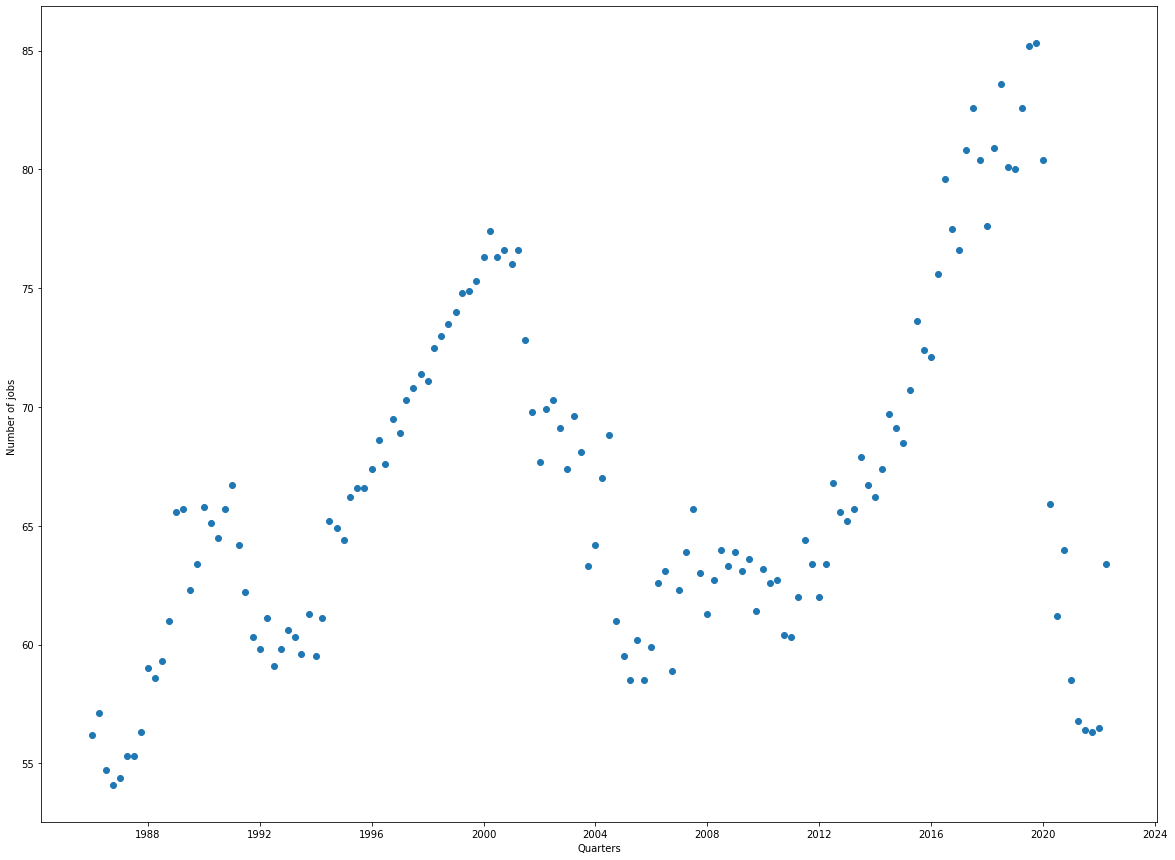

In [21]:

Transportation_jobs = tourism_jobs.loc[tourism_jobs["Activities"]=='Transportation']
plt.figure(figsize=(20,15))
plt.scatter(Transportation_jobs.REF_DATE,Transportation_jobs.VALUE);

#plt.figsize=(15,20);
plt.xlabel('Quarters')
plt.ylabel('Number of jobs ')
plt.show()


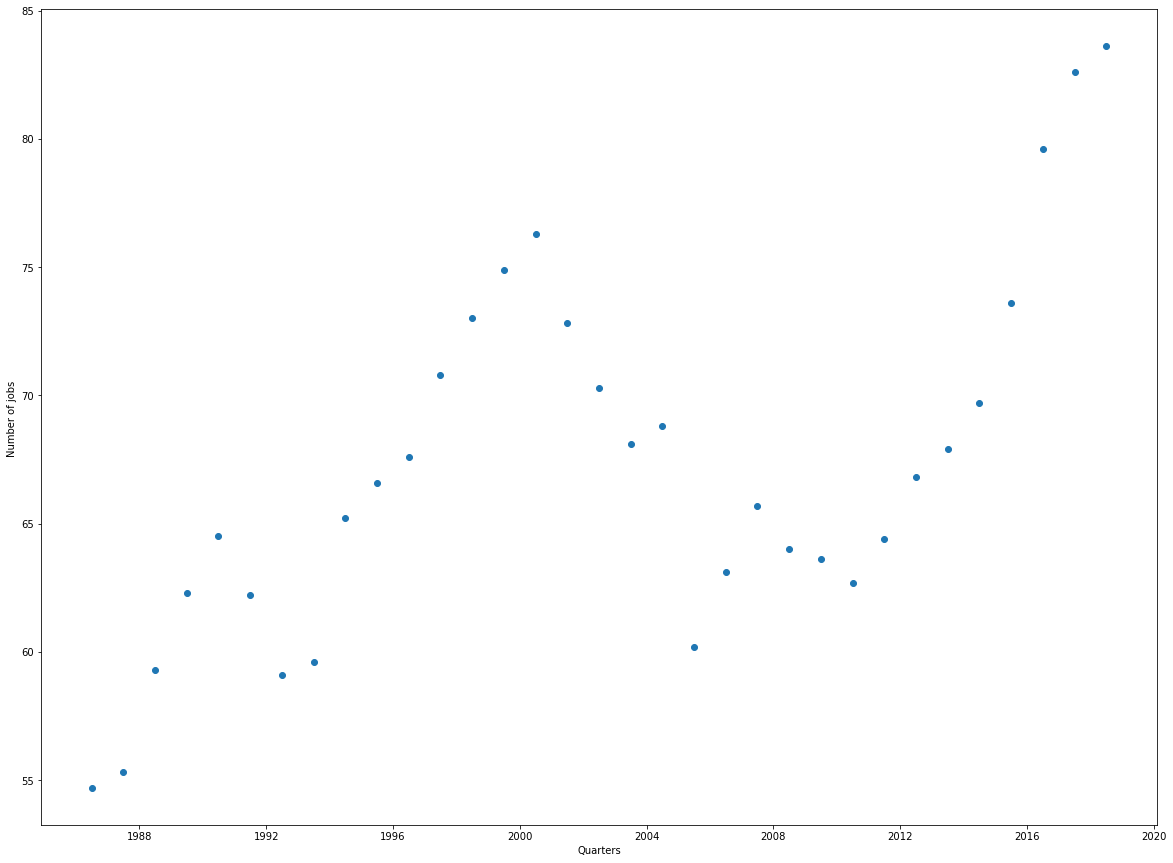

In [22]:
summer_jobs = tourism_jobs[tourism_jobs['REF_DATE'].dt.strftime('%m') == '07']
total_summer_jobs = summer_jobs.loc[summer_jobs["Activities"]=='Tourism activities']
#spring_jobs = tourism_jobs[tourism_jobs['REF_DATE'].dt.strftime('%m') == '04']
Transportation_summer_jobs = Transportation_jobs[Transportation_jobs['REF_DATE'].dt.strftime('%m') == '07']

Transportation_summer_jobs_temp =Transportation_summer_jobs.copy()
Transportation_summer_jobs_preCovid = Transportation_summer_jobs_temp.drop(Transportation_summer_jobs_temp.loc[Transportation_summer_jobs_temp['REF_DATE'] > '01-12-2019'].index)
plt.figure(figsize=(20,15))
plt.scatter(Transportation_summer_jobs_preCovid.REF_DATE,Transportation_summer_jobs_preCovid.VALUE);

#plt.figsize=(15,20);
plt.xlabel('Quarters')
plt.ylabel('Number of jobs ')
plt.show()